# Transforming Images

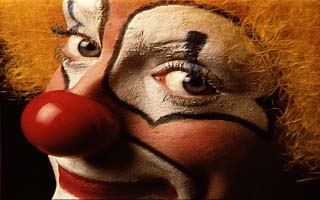

In [1]:
#@ImageJ ij
image = ij.io().open("http://imagej.net/images/clown.png")

Image transformations such as rotation, scaling and cropping are accomplished using ops of the `transform` namespace.

Most ops of this namespace have the nice property of being _views_: they do not actually copy image samples, but rather wrap the image, offering a modified "window" into the original data. Using views helps to greatly reduce computer memory usage, at a very minimal time performance cost. If you need a deep copy of the image for some reason (e.g., if time performance is paramount, or if you want to modify the transformed image samples in-place without affecting other transformed versions of the image), you can still copy it using the `copy` namespace; see "Generating images notebook" for details.

In [2]:
ij.op().ops().findAll{op ->
  op.startsWith("transform.")
}.collect{op -> op[10..-1]}

addDimensionView collapseNumericView collapseRealView collapseView concatenateView crop dropSingletonDimensionsView extendBorderView extendMirrorDoubleView extendMirrorSingleView extendPeriodicView extendRandomView extendValueView extendView extendZeroView flatIterableView hyperSliceView interpolateView intervalView invertAxisView offsetView permuteCoordinatesInverseView permuteCoordinatesView permuteView project rasterView rotateView scaleView shearView stackView subsampleView translateView unshearView zeroMinView

### Rotating an image

The `transform.rotateView` op rotates the image 90 degrees from one dimensional axis to another. 

In [3]:
ij.op().help("rotateView")

Available operations:
	(IntervalView out) =
	net.imagej.ops.transform.rotateView.IntervalRotateView(
		RandomAccessibleInterval in,
		int fromAxis,
		int toAxis)
	(MixedTransformView out) =
	net.imagej.ops.transform.rotateView.DefaultRotateView(
		RandomAccessible in,
		int fromAxis,
		int toAxis)

Here is an example usage of the `transform.rotateView` op.

Old bounds: (0, 0) - (319, 199)
New bounds: (-199, 0) - (0, 319)


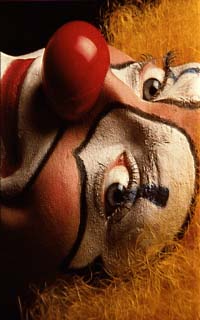

In [4]:
// set parameter for rotate
x = 0; y = 1; c = 2

// define functions to see the bounds of an image
bounds = {interval ->
  return "(" + interval.min(0) + ", " + interval.min(1) + ") - " +
         "(" + interval.max(0) + ", " + interval.max(1) + ")"
}

// Rotate the image (image, fromAxis, toAxis)
rotated = ij.op().run("rotateView", image, x, y) // 90 degrees clockwise
//rotated = ij.op().run("rotateView", image, y, x)// 90 degrees counter-clockwise
//rotated = ij.op().run("rotateView", image, x, c) // rotate through channels! WAT

// The interval bounds have automatically changed!
println("Old bounds: " + bounds(image))
println("New bounds: " + bounds(rotated))

rotated

### Cropping an image

The `transform.crop` op crops an image N-dimensionally. E.g., you can use it to create a substack of a 3D dataset, cut out irrelevant channels, or crop the XY planes as with 2D image processing software.

In [5]:
ij.op().help("crop")

Available operations:
	(ImgPlus out) =
	net.imagej.ops.transform.crop.CropImgPlus(
		ImgPlus in1,
		Interval in2,
		boolean dropSingleDimensions?)
	(RandomAccessibleInterval out) =
	net.imagej.ops.transform.crop.CropRAI(
		RandomAccessibleInterval in1,
		Interval in2,
		boolean dropSingleDimensions?)

Below, we show two ways to crop an image: 1) with `transform.crop`; and 2) using `transform.intervalView`. The former translates the image back to the origin, while the latter does not.

In [6]:
import net.imglib2.FinalInterval
region = FinalInterval.createMinSize(75, 27, 0, 40, 28, 3)

eye = ij.op().run("crop", image, region)
eyeView = ij.op().run("intervalView", image, region)

println("Eye bounds: " + bounds(eye))
println("EyeView bounds: " + bounds(eyeView))
[["eye":eye, "view":eyeView]]

Eye bounds: (0, 0) - (39, 27)
EyeView bounds: (75, 27) - (114, 54)


eye view <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAACgAAAAcCAYAAAATFf3WAAAOqUlEQVR42iWXeViOaRvGn5lhjMEgjDVbsrUgDUpp0b4n2kWkfVFoUSgkhVSGyPpZhho7g7GH0qK078nWGNsw+3wzc3y/7+r1x308z3u8y/N7z/u8zuu6lfQ1QayJWUyEvys5GxMovnCUewXZ1F7Jo7OkgMdFx6n5bidVl3bSdHO/rL28qDjBj5X5/PjwOK9rCnjXcIqf6k/yqvoEb6u+4fG1TJrPrud0iifb/Y1JctJhnYseqx21SXbWpSDGmYZdy+nMi6F9qz+PMvyoSXbh7ioLKtfa8zjDg/YNrrSvd0M5tiORtLjFxAe7cnbvZqou/4fW24epvphD+6398sDT/Fh2gkd39tNycw+1l3N4U5XP64cn+KnmW97XdcGdUoE+Lz/Co8JcXt/Ppe3cRo7FOxNnrcGiaf3wm9Ife3UFh+EKqY4TuRzrQs3GhTxMcqF+rSs1a515uM6J1nQPnshqS3aU5YyyIdKNmIXmJAXYUXpmF8+K8nlRepyW6133B3lZfoyGKzlUns2g+dpOWm/tFtBcOu7u41Xlcd7VnuRl1QkVYNf1adFeWr/bROn+SHKWGLJ4am9cNT5WAbpP7EGYwRD2Lp1DcepCWrYtpXqNK1UJDtQJYO2GebRv8eJJ2gIer3fmeeoClAQ/MzaG2LM1ypnGS7n8VnOGVyVH+Lm6gH9aL9JZdIDbh2Tr81Pk4ft5fv8gtZcyafg+m6fFB3lRfpTO0sMqVbtgO4v28b4kl4aCRA5GWRNlMpyAGYOImatJkMCluulxPt6NuqwQHmcHU5+ygMZkNzrSvWnb6kNbhqdKuafrXXiZ7oUSaK3FhgBrkheZUvbNJv6tv8ib0iP8Vp3PL+KxqlNpXNsdw+Obu/mr6Twdt/bw9N4B2m7v4YnAd0F2qflCvvNDyWHqL25R+e/WjkCy/Q0Inz2MYIPhRJqMwV2zOxGzvuR8rCuV6Ytp3OTDg1U2VMXb0bDWifJ4K26HGlAdY05zgi3PNogHDQYruOgOYmuwE+myzbd2J9J2MZuXAvJH+QmK8uKpFvCfio7x7Pp+Ou8cVnnzhfjy4XdZtBZ+gKu7mMnjG7m871JTfFh1ZDV54TZ4Tu6Jx+Q+eGv1xVPzMyJFzbLNy2jYuoza5PmULDenPGoONSvmUh9rRUuiPU3xNrStdqQl3h7FcIiCpcbnhFjq4DFtGPPlh0LnDGdXsAXnNy7haOwCLqWFULY/mdqCTCrzt/Lkjlig7jz113ZRfbmrmPbQLNemi1mUH1nHb8WHeX1jD4VfryDESB0f3f74aPfDR7Mnm2wny/ZGcD9hHoURZjxcaUnbGkeBsqIp1pKnya48S5nPoyRnqiLmoliN64nthN4EzZ1E3LxZ+E4fxIIJnxBuNJAQA/GOxVhS3WexZZE59wSy/eo+qs5kqhSsu7KD4oJUHp7bRofEz4/FR6g9lc4PV3N58f1O7u5ahadOH5zHdsdXqw+uwxTS7SZRvSWIm8ttuRFiTG28La1SvQ3xlirIJykfANtXu1ARbo5yKjOKLeGOxC6YQdoSa5YZjZBoGIPXRAWz/ooYfCCx8q99pw8mJ8yJm3vXcCEnmuoL2VLdX9MoIDWiXPXZbVJkOyk/nkqHWOSVANflp+EztZ8KMHjmUPwn9uJ4oBV3V3twb5UDlXF2VMda82C5CVUxJjQmWKm2tzHWluZ4R2pibFCeFR+l8tx2TmQEczU3gdOblnI8zplQg364aShEmY9htdM0nMb3xkWrH4FSjTHOU9gSasvJLcE0Xs5WqVd6Io3iYxIv4tfWC1n8+SCf3ysKWGEzEWtRbpF2X8KnDeBuyiJurHCiaIU9FQLyINqc+2GGVESbUhdvzcMV5lIkFjQlOFIvkEpnxXHe1p6VgD3I64pv+U2C+d2dvVzZvFhMbkearxEbfMyItJuKu94QrMZ9ht9sdRaLT1e6aJOf6s/9Iylc2xPLjbwkKgoyaBFF35cc45+a8yQv+ArjfgqOAhmk/QUXIh25n+jBzTAzbi4zoCzKlBrxXteqirWgapUVNatsaUp0oTFxHsqbpgv823mXf54V8mvzFf5qvAR153h6KZvbuXFskJyMcZlJoo8F0a6zcJ46EOtxn7JgWl8CTUeQE2rFzd0rKTuynqqTW3l0NY968eTzm3n8W3uBXLGFzVCF+SM/Jn72CM6G2lC9YSHF0TbcDpotypkLiJ0KrlwquVripS7OnjpRsC5RYuavV0Xw/gFCJqDF/N1RKK3qGE3nsjiashR7LTV0vlCwmjwIP3NtbLX6YyQPjLHXJjfKgUtbQmj4Np0m8WDxwbVck8r9fucKgc1ADErBWn9sRT1nWRnynVsJHtSsX0jjei/qJUqqRbGqlXMpX25GabQZNasdqBHAylWypNKVv7vg/m7mr5cl/O91BX88usPLstNEO+tjPKoHc8b1wWS8Gn4W0/E202GxhS7Wmr2JsNEizkmXnaJIdqAFoSbqbPIx4Hx6CO1SLM+6svLmIVpOZ+M+oSch+pK1jrrcW+tN9XoJ6PguEDvaU+ZJFbuo4qZMvFct0EXhphRFWHItRGLmz7dl/P22gv+9qxIl62i5d5IwV0P8LacQMX8OGyO9SIvxJyXchwDH2UTMMybB25Jwm6nEOulzMNaTzb4m2I9WCJw9nMMJXtyQeOnagaffS/RcP0iczWQWTe5Fjrs+DVnhdGSH0pzqRVPyPB7JxNKY6MD9cBNuBRpyL8KUu6GmKguUdCn468ti3j29gyQvPzbeICspgGnDPiMzbhn3zhygs6aQ359W87jiOjcK9lBx6SinctbhMWsc9hP6s8bDlATXmThK8TiKN6OsJpK5zFqUDKP88CbeFh5l+5K5WEhk7fM3oW13NK1ZgTSmutO4zpmWZMnA1faUSWgXh5lQutyKW0EmlKxypDhxPsq7p7f4+clt/vtDCad3JzNzTG9maaiRvyOV0kvHaSq6yKvm+7Q/uModAb537hCpkYuZMqA7IxQF4xG98Jw+Gt8Zo3DTHcBigxEsNRzJ9qVWfLPGn44LuzgS68GMbgpHQiyo2xFGvcyAtaJc7RoHGtfYU59gR2W0pSwbqWZHCkPMqE3xUcWR8lObVO6TQl5UnmWltxmD5KEh8+dyPT+PssvfUFt4ikcPrqiuBXvSSFsVhGb/T+kvnxssa8RHClp9PmbuODU89Eezzssch9E9+DrQQSBtKNoj0XMoRTUH5i0xpm5nKG07g2iRyaVZxqumtQ7UxtlQEWlOWaiscCvxogPtmUGcDbIQBZvP80fb91Sf34Gb/hCGy0MDnU3YsymOCwe2UHrxIMXn9nEybyORC+2Zot6fPvKZAQI2sndvBsn1S3k9toeCoXofop0MpXP04kxyIBvdjTiVEsAvRd+QYKvJ14tm8vx4Ii27gmjdLvOgzH1dW1wbKwpGSsyESGhLYTyMc6VinReZNuNR/mg5z6+1pyRkV2Mxqhu6vRQsJg/F3WwqUV4WbI7xISXMjeW+FszRGobaxwpDen4qqzcDevRC7ZPPBPYjBgjk6M8EcnhPHMZ+zjY/C5lk+pHkrMeNrGjCjIeywXkC1bkhVGX60iBzX/Om+SpAVddYaUdNlCgZIa0vzoUC3xlETvwU5d+27yQGT3BxWziGYmSdngpO00ZhpDkII42+mE8awAz1HuiP7MlogR/yqcIXAtNX+YTeSjf6f9xDropqy0f16sZYeT/UbAorrXSxVe/GcosJpPvNIXDWQHYHGVG3L0IFWL/Vg2ZRsDlFzidSxV3do2K5JSXhkonxLmRZjGbpGAXlhzuHeFN0lDObAjEeKAoMUrDTGoy19nDsp47CdYYmtjqjmPplT9S7i+c++eC9Lq8O6dad4T16yv1H9JPXwz/tjt6XanhNH0+YuQCOkcoe35Nkz69IXziD4l3BtJ+IpX

### Scaling an image

To perform [image scaling](https://en.wikipedia.org/wiki/Image_scaling), use the `transform.scaleView` op. You already saw it in action in the "Getting started" section, but here it is againâ€”this time enlarging an image rather than reducing it.

Just for fun, we compare three different interpolation strategies: [nearest neighbor](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation), [N-linear](https://en.wikipedia.org/wiki/Linear_interpolation), and [Lanczos](https://en.wikipedia.org/wiki/Lanczos_resampling).

In [7]:
import net.imglib2.interpolation.randomaccess.NearestNeighborInterpolatorFactory
import net.imglib2.interpolation.randomaccess.NLinearInterpolatorFactory
import net.imglib2.interpolation.randomaccess.LanczosInterpolatorFactory

scaleFactors = [4, 4, 1] // Enlarge X and Y by 4x; leave channel count the same.

nearestNeighborEye = ij.op().run("scaleView", eye, scaleFactors, new NearestNeighborInterpolatorFactory())
nLinearEye = ij.op().run("scaleView", eye, scaleFactors, new NLinearInterpolatorFactory())
lanczosEye = ij.op().run("scaleView", eye, scaleFactors, new LanczosInterpolatorFactory())

[["nearest neighbor":nearestNeighborEye, "N-linear":nLinearEye, "Lanczos":lanczosEye]]

nearest neighbor N-linear Lanczos <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKAAAABwCAYAAACZ8XsCAAASR0lEQVR42u3dZ1DUd/7A8TWxRo2VRMWOWAFFORUUEVh6F5UqiiK9CCpFUAFFBLGAURQ1epaIxK4xJlZUUEGQ3sFKjC1qksvlcpnb++38j5l9783c033w/z54Pfns7rDlzcx+fvPbXVnG2iCF0tqYJRDh7wY5GxOg+MJRuFOQDdWX86D9XgE8LjoOVd/sgopL1HD9gJp98KIsH34sP0EPj8PrqgJ4V3cKfqo9Ca8q8+FtxVfw+Mo2aDybCqdTPGG7vykkOevDetepsMZJD5JdDKAgxgXqdq+A9rwYaM3yh7ZMP6hKdoXbq+VQvs4BHmd6QOsGN0p1p//MZSJAEaBGAzy2M1GhlB63BOKD3eDsvs1Q8e1fofnmYai8mAOtNw7A24rT8GNJPrTdOgBN1/dC9bc58KbiBLx+mA8/VX0N72tOwU+1pB7o89Ij0FaYC6/vUsu5jXAs3gXibHRgsWFf8JvcDxyGycBRm9KcxsO3sa5QtXERPExyhdp1blC1zgUerneG5gwPeKKmJdlJjYua/5uLAEWAIkARoAhQBCgC1EyAGyLdFUoxiywgKcAe7p/ZDc+KTsCL+8eh6epueFZ0EF6WHoO6yzlQfjYTGq/sguYbe6Dpei48ur0fXpUfh3fVJ+FlRT6oB6h++dOifdD8zSa4fyAScpaawJIpvcBN5yNQD3Dh+G4QZjwI9i2bA8Vpi6Bp6zKoXOsGFQmOUCNFp6p6wzxo3eIFT9IXwONUF3ietgA65iJAEaAIUAQoAhQBigA1E2CCn7lCaWOIA2RFuUD9pVz4teoMvLp3BD5UFsA/my9Ce9GXcPNQAhSfSIGnRQfg+d2DUH1pG9R9lw1Piw/Ci9Kj0H7/MKgvNerBthfth/f3cqGuIBEORtlAlJk2BEzXghhLXQiSIlOV5j4Vzse7Q82OEHicHQy1KQugPtkdHmV4Q0uWD2V6ktqS8TTVFV5meEHHXAQoAhQBigBFgCJAEaBmAgy0maRQ2hBgA8mL50LJV5vgz9qL8Ob+Efi18gT8/PA4VJxKhyt7YuDx9T3we8N5eHRjLzy98yW03NwLT6TIVakHqb60vJAeg6of7h2G2otbQP3kgxs7AyHb3xjCZw2BYGNtiDQbBQt1u0DEzM/gfKwblGcsgfpNPvBgtS1UxNtD3TpnKI23hpuhxlAZYwGNCXbwbIM7dMxFgCJAEaAIUAQoAhQBaiZA489lCiVXAy3ICnaGjAB7uLEnEVouZsNLKQpVv5XmQ1FePFRKUav6qegYPLt6ANpvHQb1kx1elOTDw292QHPhflAPrubiNnh8LRfeS4uKqjeFuVBxZA3khduC58Qe4DGxN3hP6gOeut0hUlpUVJVsXg51WVSdPB/urbCA0qg5ULXSEmpjraEp0QEa4m2hZY0TNMU7QMdcBCgCFAGKAEWAIkARoGYCNBkkUyhZ6XwCIVb64GE4BOZLT4qq0DnasDtYDuc3LoWjsQvgUnoIlBxIhuqCbVB+Igue3DoCH2rOQ+2V3VD5bQ60Sv8kqhqlmaqGizug9Mh6+LX4MLy+thcKv1gJIbOHgY9BP9LrS7o9YJPdRKjZEQF3E+ZBYYQ5PFxlBS1rnaBBWjQg1gqeJrvBs5T50JbkAhURltAxFwGKAEWAIkARoAhQBKiZAK3H9FAo2Y3rBUGWEyBu3kzwnaYFC8Z9DOGzB0KIsRbEyEdD2sKZsGWxBdyRIlTV+v1+qDizDdSXkJrLO6G4IA0entsKj67vgx+Lj0D1qQz44ftcePHdLri9ezV46vcGl9FdwHdSb3AbIoMM+wlQuSUIrq+wg2shplAdbwfNyg8aqaiLtwL1IJ+kuIF6gK1rXKEs3AI65iJAEaAIUAQoAhQBigA1E+CpbVEKpS3hThC7YDqkL7WB5bOHQpzNKPAaLwPzfhQwfSDESm+kVflO+xxywpzh+r61cCEnGiovZEPd5S+gXopCVZW0WKiqPLsV6i/tgtLjafDoYja8kqJVVXMiHXym9AX1AINnDAb/8T3heKA13F7jAXdWO0J5nD1UxtrAgxVmUBFD9QnWoH7guT7WDhrjnaAqxhY65iJAEaAIUAQoAhQBigA1E+Cz4qMKpfJz2yE/Mxi+z02A05uWwfE4Fwg17gvuOjKIshgFa5wNwXlsL3Cd1BcCLXUhxmUybAm1g5NbgqH+22xQXzru56dD8bFNcP8rar6wA/7+4AT8rawAVtqOBxtpsVC1WK8PhBsOgNspi+HaSmcoWukAZVIUqh5EW8DdMBMoi54LNfE28HClBVTGyKEhwQlq46ljLgIUAYoARYAiQBGgCFAzAbaXHVcova0+C22FB+F12dfwa8VpeHdrH1zevATywu0h3Xc2bPAxh0j7KbBw6iCwHtMd/GYNgyVztGGVqx6cSPOHu0dS4MreWLiWlwRlBZnQJC0uqt7fOwb/rDoPyQv+AqZ9ZeA0hIL0PoULkU5wN9EDroeZ03JjKImaC1WxVv9TRaycVltD1Wo7aEh0hfrEedAxFwGKAEWAIkARoAhQBKiZAN80XFAo/dl+G/75rBB+abwMv9dfAkXNOXh6KRtu5sbBBj9ziHGdAYk+coh2mwkuUwaCzZiusMCwDwTOHQo5odZwfc8qKDmSChUns6Dt+zyoPbcVnl/Pgz+rL0BumDPYDpbB/OEfQfysoXA21BYqNyyC4mhbuBk0C8qkxUNVfaI9qAdXutISKhPsoCbOgaQFAxLd6T9zEaAIUAQoAhQBigBFgJoJ8PdXRQolxfsH9Hs9/NleDH88KoTXd49Bw7kdcDRlGThM6g/6n8rAeqIW+Fnogd2kfjBbetFUxTjoQW6UI1zaEgJ1X2dAw9mtUHxwHVz5YiV8t4sqTmaCov47KFjnD3bSoqHKRU2m9BhU3UjwgKrURVCf6gW1a5ygUlocVFWssoTSFeZwP5qq1jiSFJ2q8tVqEubRf+YiQBGgCFAEKAIUAYoANRPgH1JsSoo/GuH3l/fgX6/L4Le2W/Cy5DREuxiB6YhuMGdMbzAb2x/85NPA21wflsgNwEa3F0TYToI4ZwPYJb1xV5UdKIdQs2GwyccYzmeEQOulXfDsxgF4cf0QNJ3OhoXjekCIkRZkORnAnXXeUJnqAw/iHaEqzh5aU+ZB83pXUP/gekmMHCqVEasoCp9LEVZwJcQSOuYiQBGgCFAEKAIUAYoANRPg39+WKJT+eFsG/3pXAYr3NdB05ySEuZmAv9VkiJg/BzZGekF6jD+khPtAgNMsiJhnCgneVhBuOwVinY3gYKwnbPY1A4eRMgicpQ2HE7zg2u7VoL6EPf1uH/x49SDE2U6ExRN7Qs5CI6jbEQ6PskOhMc0LGpLnQVuqO9QnOsLdcDO4EWgCdyLmwu1QUj8Qfk9aPFR1zEWAIkARoAhQBCgCFAFqJsBfXhYrlN49vQWKDzXwY/012JEUAIZDusO2uOVw58yX0F5VCH97WgmPy67CtYK9UHbpKJzKWQ8eM8eAw7h+sNZjLiS4zQCnMd3VdIUo6/GwbbkNnM8Ig9LDm+Bt4VHYvtQS5P1ksN/fDFr2REPzjkCoT1tI612gKdkZ6tY4QEmEORSHmcH9FdZwI8gM7q12guLE+dAxFwGKAEWAIkARoAhQBKiZAN89vaFQ+vDkJvzjh3twek8yzBjVC2bq9IcTO9Pg/qXj0FB0EV413oXWB9/DLSlaVXfOHYK0yCUweUAXGCqTgenQnuA5bST4Th8B7gYDYInxUFhmMhy2L7OGr9b6w6MLu+FIrAdM7yyDIyFyqNkZBrVZ/lAtLRaw1hHq1zpAbYI9lEdbqbGFqlgnKAwxh+oUH1D/4HzHXAQoAhQBigBFgCJAEaBmAvyp5bJC6fcnhfCi/Cys8jYHLelFVBUy3xKunsiDk

Of course, some detail from the original image has been lost, since we scaled down and then back up again.

### Padding an image

The `transform.intervalView` can also be used to expand the bounding box of an image. However, there is one catch: you must first decide what the out-of-bounds sample values will be. The `transform.extend` ops achieve this goal. If you forget to extend the image before padding it via `intervalView`, you will receive an exception when attempting to query any out-of-bounds samples.

Note that the various `transform.extend` ops explicitly remove the bounding box of an image, expanding the defined sample values to infinity in all directions. In most circumstances, you will want to use `transform.intervalView` to rebound the image after extending it.

In [8]:
ij.op().ops().findAll{op ->
  op.startsWith("transform.extend")
}.collect{op -> op[10..-1]}

extendBorderView extendMirrorDoubleView extendMirrorSingleView extendPeriodicView extendRandomView extendValueView extendView extendZeroView

Here are some side-by-side examples of what happens when you pad an image with these various approaches:

In [9]:
def pad(image, extended, t, r, b, l) {
  min = new long[image.numDimensions()]
  max = new long[image.numDimensions()]
  image.min(min)
  image.max(max)
  min[0] -= l; min[1] -= t; max[0] += r; max[1] += b
  return ij.op().run("intervalView", extended, min, max)
}

// Define the top, right, bottom and left padding amounts.
t = r = b = l = 20

// Pad the image with different out-of-bounds strategies.

extendedBorder = ij.op().run("transform.extendBorderView", eye)
paddedBorder = pad(eye, extendedBorder, t, r, b, l)

extendedMirrorDouble = ij.op().run("transform.extendMirrorDoubleView", eye)
paddedMirrorDouble = pad(eye, extendedMirrorDouble, t, r, b, l)

extendedMirrorSingle = ij.op().run("transform.extendMirrorSingleView", eye)
paddedMirrorSingle = pad(eye, extendedMirrorSingle, t, r, b, l)

extendedPeriodic = ij.op().run("transform.extendPeriodicView", eye)
paddedPeriodic = pad(eye, extendedPeriodic, t, r, b, l)

minValue = eye.firstElement().getMinValue().doubleValue()
maxValue = eye.firstElement().getMaxValue().doubleValue()
extendedRandom = ij.op().run("transform.extendRandomView", eye, minValue, maxValue)
paddedRandom = pad(eye, extendedRandom, t, r, b, l)

value = eye.firstElement().copy(); value.set(100)
extendedValue = ij.op().run("transform.extendValueView", eye, value)
paddedValue = pad(eye, extendedValue, t, r, b, l)

extendedZero = ij.op().run("transform.extendZeroView", eye)
paddedZero = pad(eye, extendedZero, t, r, b, l)

[["border":paddedBorder, "mirror double":paddedMirrorDouble,
"mirror single":paddedMirrorSingle, "periodic":paddedPeriodic,
"random":paddedRandom, "value":paddedValue, "zero":paddedZero]]

border mirror double mirror single periodic random value zero <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAFAAAABECAYAAAAWVrIgAAAPk0lEQVR42u2Z51dU5xaHTxKNMWrssVfERlGQqCBIkd4GROmCKNK7ShFUioggImAUxXotUYldo8aOCiII0jtiI8YWTc/NzbrPfRn/hfPtzodnnTOLGdY6z9rv3r89I2WuDURu1sYsJdzPmfwNCZSeP8zdojzqLhfSVVbE45Kj1H63neqL22m+sVewmxeVx/ix6jg/PjzK69oi3jWe5KeGE7yqOcbb6m94fDWHljOpnEpxZ6ufEUmOWqx30mWNgybJCm2KYhQ07oiiqzCGjmw/HmX5UJvsxJ3V5lSts+Nxlhsdac50pLrIjqQSqBKoEqgSqBKoEqgSqBKoEqgSqBKoEqgSqBKoEqgSqBKoEqgSqBKoEqgSqBKoEvj/IPDItkTkJiNuKfFBzpzZvYnqS/+i7dZBai7k03FzrxByih/Lj/Ho9l5ab+yi7lI+b6qP8/rhMX6q/Zb39d3yTipFPq84xKPiAl7fK6D97AaOxCuIs1LDV2cAPjMGYjdGwn6URLrDVC7FOlG7YQkPk5xoWOdM7ToFD9c70pbpxhNBe7KDQCE7UlqEC3ITs8SMJH9b7p/ewbOS47y4f5TWa933+3lZcYTGy/lUncmi5ep22m7uFCIL6Lyzh1dVR3lXd4KX1ceUAruvT0t20/bdRu7vjSB/mQFLZ/bFWe1jpUDXqb0I1R/O7uXzKU1fQuuW5dSsdaY6wZ56IbAubSEdmz14krGYx6kKnqcvlh0pwccUudkQbEd2pIKmiwX8VnuaV2WH+LmmiP+0XaCrZB+3DoijfTxFyNnL83v7qbuYQ+P3eTwt3c+LisN03T+orMpumV0le3hfVkBjUSL7I62INB6F/+yhxCxQJ1DIS3fR5Vy8C/W5wTzOC6IhZTFNyS50ZnrSnu1Fe5a7slKepjrxMtNDdqQAKw3kJs3fimRfE8q/2cg/DRd4c/8Qv9Uc5xfR46pPZnB1ZwyPb+zkr+ZzdN7cxdO7+2i/tYsnQm63xO5qfCE+80PZQRoubFb2v5vbAsjz0yds3kiC9EcRYTwBV/WehM/9knOxzlRlLqVpoxcPVltTHW9L4zpHKuItuRWiT02MGS0JNjxLc5EdSX+YhNw4aQ8lO8iRTHGMb+5MpP1CHi+FqD8qjlFSGE+NEPtTyRGeXdtL1+2Dyt74QvTFh9/l0lb8QV79hRweXy/gfXc1ij5YfWgNhWHWuE/vjdv0fnhq9Mdd/TMiRDWWb1pBY/YK6pIXURZlRkXkfGpXLqAh1pLWRDua461pX+NAa7yd7EgGwyXkxkLtc4IttHDTGcki8aAh80exI8iccxuWcTh2MRczginfm0xdUQ5Vx7N5clsc8fpzNFzdQc2l7mGzixZxbb6QS8Wh9fxWepDX13dR/PVKgg3H4KU9EC/NAXip92ajzXRxfMO5l7CQ4nBTHq6yoH2tg5BmSXOsBU+TnXmWsohHSQqqwxfIjmQ5qTdyYzOlL4ELphG3cC7es4ayeMonhBkOIVhf9C7ziaS7zmWzrxl3hcSOK3uoPp2jrMD6y9soLUrn4dktdIp482PpIepOZvLDlQJefL+dOztW467VD8XEnnhr9MN5pESm7TRqNgdyI8qG68FG1MXb0Camb2O8hVLik5QPAjvWOFEZZiY70smcSORmc5gDsYtnk7HMihWGo0X0mIDHVAnTgZIYAEOIFVXjPWsY+aGO3Ni9lvP50dSczxPT+WuahKhaUXk1Z7aIIbSdiqPpdIoW8EoIrT+egdfMAUqBQXNG4De1D0cDLLmzxo27q+2pirOlJtaKB1HGVMcY05RgqTy+TbE2tMQ7UBtjLTvSs9LDyE3V2a0cywriSkECpzYu52icghD9AbioSUSaTWCNow6Ok/vipDGAADFNYxQz2Bxiw4nNQTRdylNW3/1jGZQeEfFF9Mu287n8+eA4v1cWsdJ6Klai8nw1+xOmM5g7Kb5cX+lIyUo7KoWoB9Fm3As1oDLahPp4Kx6uNBNDxJzmBAca4uVH6qo8ity8rTsjAvB+Xld+y28iOL+7vZvLm5aKIWBLhrchaV6mRNjOxFV3uDjyn+EzbwxLRZ9c5aTJ8XQ/7h1K4equWK4XJlFZlEWrqMj3ZUf4T+05khd/hdEACQchMVDzC85HOHAv0Y0boabcWKFPeaQJtaL3dVMda071aktqV9vQnOhEU+JC2ZHeNJ9Hbv7pusN/nhXza8tl/mq6CPVneXoxj1sFcaSJnBjjNIdEL3OineeimDkEq0mfslinPwEmo8kPseTGzlWUH0ql+kQ2j64U0iB64vMbhfxTd54CceytR0gsGvsx8fNGcybEmpq0JZRGW3MrcJ6oPDPxYLZKeRViEteI+FIfZ0e9qMD6RBfZkf56VYLc8P4BwpwQWcrfncViFTtC89lcDqcsx05jEFpfSFhOH4qPmSY2GgMxFEJi7DQpiLTn4uZgGr/NpFn0wNL967gqJu/321cKmVmIBknROj9sRPUpBFniMzcT3KhNXUJTqgcNIqrUiIqrXrWAiihT7kebUrvGnlohsGq1QExquZH+Fg8rN/zdwl8vy/jv60r+eHSbl+WniFboYTSuF/Mn9cN48iB8zGfhaarFUnNtrNT7Em6tQZyjNttFReUFmBNiPIaNXvqcywymQwyTZ91Z8cYBWk/l4TqlN8F6Ims6aHN3nSc1qSJAx3eLsqUjZaGYwk7KOFMuel+NkFoSZkJJuAVXgxfIjvTn23Lk5u+3lfz3XbWoxHpa754g1NkAP4sZhC+az4YIDzJi/EgJ88LfYR7hC41I8LQgzHomsY567I91Z5O3MXbjJQLmjeJgggfXRXzpruCn34toc20/cdbT8Z3eh3xXPRpzw+jMC6El3YPm5IU8SnURR9iee2HG3Aww4G64CXdCTJRHvExUjNxIv74sRW7ePb2NSMb82HSd3CR/dEZ+Rk7cCu6e3kdXbTG/P63hceU1rhftovLiYU7mr8dt7iTspgxkrZsJCc5zcBDDxUH0xkjLqeSssBKVGErFwY28LT7M1mULMBeRaI+fMe07o2nLDaAp3ZWm9Qpak0UGXGNHuQjVpaHG3I+y5GagMWWrHShNXCQ70runN5Gbn5/c4t8/lHFqZzJzJvRlrtogjm9L5/7FozSXXOBVyz06HlzhthB69+wB0iOWMmNwT0ZLEkaj++A+azzes8fhoj2YpfqjWW4wlq3LLflmrR+d53dwKNaN2T0kDgWbU78tlIZsP+pE5dWttadprR0NCbZURVsIRFaLdaA42JS6FC9l3JEb6af2y8jNX0+KeVF1hlWepgwVUoIXLeDa8ULKL31DXfFJHj24rLwW7cogY3Ug6gM/ZaB43zDB6I8kNPp9zIJJg3DTG896DzPsx/fi6wB7IdGakl0i2hxIUX4PWLjMiPrtIbRvD6Q124uWtIU0r7OnLs6ayggzykMEYZaiF9rTkRPImUBz2ZHetZxDbv5o/56ac9tw0RvOKCElQGHMro1xnN+3mfsX9lN6dg8nCjcQscSOGWMG0k+8Z7AQN7ZvX4aK65fi9cReYq8e049oRwOxefThdHIAG1wNOZnizy8l35Bgo87XvnN4fjSR1h2BtG1dQmvGYuURrosVFRghYkywCNWi0T+Mc6ZyvQc51pNlR/qjVTywzPxad1KE4DWYj+uBdh8J8+kjcDWdSaSHOZtivEgJdSHK25z5GiMZ9LHE8N6fCvoyuFcfBn3ymZD5EYOFxPGfCYmjemM/8XO2+JjjPn0ASQpdrudGE2o0gjTFFGoKgqnO8aYxy52WjYuUApVbxypbaiNFJYaL1S7OiSLv2URM/VR2pH/av0Nu3j84xoUtYRiIRq/VW8JRZxyG6kMxVOuP2bTBzB7TC72xv